# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Jihad Rafsanjani
- **Email:** rafsanjanijihad@gmail.com
- **ID Dicoding:** jihadr

## Menentukan Pertanyaan Bisnis

- Bagaimana kinerja penjualan berdasarkan dataset ini?
- Begaimana perilaku customer dalam bertransaksi berdasarkan data ini?

## Import Semua Packages/Library yang Digunakan

In [1]:
#Melakukan imoprt Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import glob 

## Data Wrangling

### Gathering Data

In [2]:
#Melihat files yang tersedia pada path directory
path = "/Users/macair/proyek_analisis_data/submission/data/E-Commerce Public Dataset"
dir_list = os.listdir(path)
print("Files and directories in '", path, "' :")
# prints all files
print(dir_list)


Files and directories in ' /Users/macair/proyek_analisis_data/submission/data/E-Commerce Public Dataset ' :
['order_payments_dataset.csv', 'New Text Document.txt', 'product_category_name_translation.csv', 'orders_dataset.csv', 'order_items_dataset.csv', 'order_reviews_dataset.csv', 'sellers_dataset.csv', 'geolocation_dataset.csv', 'products_dataset.csv', 'customers_dataset.csv']


In [3]:
#mengubah data csv menjadi dataframe
df_customer = pd.read_csv('/Users/macair/proyek_analisis_data/submission/data/E-Commerce Public Dataset/customers_dataset.csv')
#df_product = pd.read_csv('/Users/macair/proyek_analisis_data/submission/data/E-Commerce Public Dataset/products_dataset.csv')
#df_geolocation = pd.read_csv('/Users/macair/proyek_analisis_data/submission/data/E-Commerce Public Dataset/geolocation_dataset.csv')
#df_seller = pd.read_csv('/Users/macair/proyek_analisis_data/submission/data/E-Commerce Public Dataset/sellers_dataset.csv')
#df_review = pd.read_csv('/Users/macair/proyek_analisis_data/submission/data/E-Commerce Public Dataset/order_reviews_dataset.csv')
#df_orderitem = pd.read_csv('/Users/macair/proyek_analisis_data/submission/data/E-Commerce Public Dataset/order_items_dataset.csv')
df_order = pd.read_csv('/Users/macair/proyek_analisis_data/submission/data/E-Commerce Public Dataset/orders_dataset.csv')
#df_product_category = pd.read_csv('/Users/macair/proyek_analisis_data/submission/data/E-Commerce Public Dataset/product_category_name_translation.csv')
df_payment = pd.read_csv('/Users/macair/proyek_analisis_data/submission/data/E-Commerce Public Dataset/order_payments_dataset.csv')


In [4]:
#Melihat masing - masing dataset yang digunakan
df_customer,df_order,df_payment

(                            customer_id                customer_unique_id  \
 0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
 1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
 2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
 3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
 4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
 ...                                 ...                               ...   
 99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
 99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
 99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
 99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
 99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   
 
        customer_zip_code_prefix          customer_city custom

**Insight:**
1. df_orders (99,441 baris, 8 kolom):
    - Berisi informasi pesanan, termasuk status pesanan dan timestamp terkait pengiriman.
    - Beberapa kolom memiliki nilai yang hilang, seperti order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date.

3. df_payments (103,886 baris, 5 kolom):
    - Berisi informasi pembayaran, termasuk metode pembayaran, jumlah cicilan, dan nilai transaksi.

4. df_customers (99,441 baris, 5 kolom):
    - Berisi informasi pelanggan, termasuk lokasi berdasarkan kota dan negara bagian.


### Assessing Data

In [5]:
df_order.info(), df_payment.info(), df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  obje

(None, None, None)

**Insight:**
- orders_df (99,441 baris, 8 kolom): berisi informasi pesanan dengan timestamp pemesanan, status, dan tanggal estimasi pengiriman.
- payments_df (103,886 baris, 5 kolom): berisi informasi pembayaran terkait pesanan dengan metode pembayaran, jumlah cicilan, dan nilai pembayaran.
- customers_df (99,441 baris, 5 kolom): berisi informasi pelanggan seperti ID unik, kode pos, kota, dan negara bagian.
- Data pada seluruh kolom df_customer dan payment menunjukan jumlah yang sama, ini berarti tidak terdapat null-values pada dataframe tersebut
- Data pada seluruh kolom df_order menunjukan jumlah yang berbeda, ini berarti terdapat null-values pada dataframe tersebut.
- Terdapat kolom yang tidak memiliki Dtype yang tidak sesuai pada df_order seperti order_purchase_timestamp yang seharusnya bertipe datetime dan order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date yang seharusnya bertipe date karena menunjukkan tanggal.

### Cleaning Data

#### Data cleaning akan dilakukan pada ketiga dataset tersebut dengan memperhatikan:
- Menghapus missing values
- Menangani data yang tidak wajar
- Mendeteksi dan menangani outliers
- Memastikan tipe data sudah sesuai
- Mendeteksi duplikasi data

In [6]:
# Mengecek duplikasi berdasarkan customer_id
duplicate_customers = df_customer[df_customer.duplicated(subset="customer_id", keep=False)]
duplicate_orders = df_order[df_order.duplicated(subset="order_id", keep=False)]

# Jumlah data yang terduplikasi
print("Jumlah data duplicate pada df_customer =", len(duplicate_customers))
print("Jumlah data duplicate pada df_order =", len(duplicate_orders))



Jumlah data duplicate pada df_customer = 0
Jumlah data duplicate pada df_order = 0


In [7]:
# Mengonversi kolom tanggal ke format datetime
date_columns = [
    "order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date",
    "order_delivered_customer_date", "order_estimated_delivery_date"
]

for col in date_columns:
    df_order[col] = pd.to_datetime(df_order[col], errors="coerce")

# Cek jumlah missing values setelah konversi

missing_values = df_order.isnull().sum()

# Menampilkan ringkasan missing values
missing_values


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [8]:
# Handling missing values in df_order:
# - Missing `order_approved_at`: Bisa terjadi jika order belum disetujui, biarkan NULL
# - Missing `order_delivered_carrier_date`: Bisa terjadi jika order belum dikirim, biarkan NULL
# - Missing `order_delivered_customer_date`: Bisa terjadi jika order belum sampai, biarkan NULL

# Checking for outliers in df_payment (especially in payment_value)
q1 = df_payment["payment_value"].quantile(0.25)
q3 = df_payment["payment_value"].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identifying outliers
outliers = df_payment[(df_payment["payment_value"] < lower_bound) | (df_payment["payment_value"] > upper_bound)]

# Display the number of outliers detected
outliers,len(outliers)


(                                order_id  payment_sequential payment_type  \
 23      4d680edbaa7d3d9bed69532957368a03                   1  credit_card   
 26      d0a945f85ba1074b60aac97ade7e240e                   1  credit_card   
 52      2e2c60b99754ae1e4d8b18846cfec9f2                   1  credit_card   
 54      95442deb81a5d91c97c0df96b431634a                   1       boleto   
 61      3ab4eea6776259ae8dfbabaeffece352                   1  credit_card   
 ...                                  ...                 ...          ...   
 103814  df8ab61cb615d551483618533aceb364                   1  credit_card   
 103843  262bf694d9c87de7844dd80b98fcfef3                   1  credit_card   
 103861  691688405bcee3ff9023639514498962                   1  credit_card   
 103881  0406037ad97740d563a178ecc7a2075c                   1       boleto   
 103884  b8b61059626efa996a60be9bb9320e10                   1  credit_card   
 
         payment_installments  payment_value  
 23            

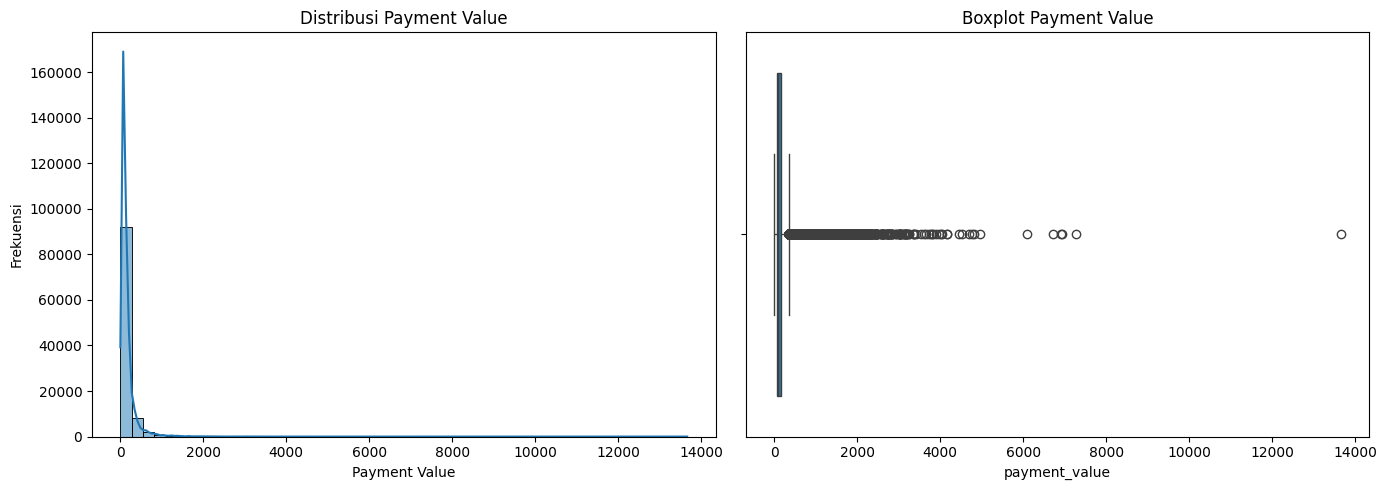

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram dan boxplot untuk melihat distribusi payment_value
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
sns.histplot(df_payment["payment_value"], bins=50, kde=True, ax=ax[0])
ax[0].set_title("Distribusi Payment Value")
ax[0].set_xlabel("Payment Value")
ax[0].set_ylabel("Frekuensi")

# Boxplot
sns.boxplot(x=df_payment["payment_value"], ax=ax[1])
ax[1].set_title("Boxplot Payment Value")

plt.tight_layout()
plt.show()

Dari histogram dan boxplot:
- Distribusi sangat skewed ke kanan, menunjukkan adanya nilai-nilai pembayaran yang sangat besar.
- Outliers terletak jauh di atas batas normal, yang bisa mengindikasikan transaksi besar atau error data.
- Gunakan Winsorizing untuk membatasi nilai pembayaran ekstrem ke persentil 99% agar tetap mempertahankan pola transaksi valid.

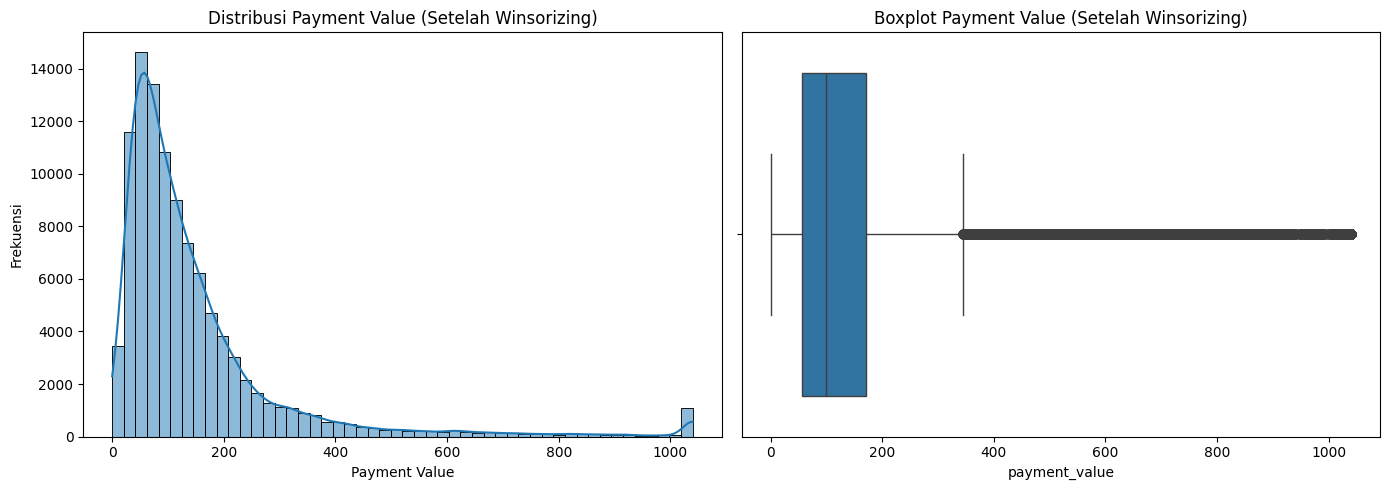

In [10]:
# Winsorizing: Mengganti nilai di atas persentil 99% dengan batas tersebut
upper_limit = df_payment["payment_value"].quantile(0.99)

# Update outliers dengan batas atas
df_payment["payment_value"] = df_payment["payment_value"].clip(upper=upper_limit)

# Visualisasi ulang setelah Winsorizing
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Histogram setelah Winsorizing
sns.histplot(df_payment["payment_value"], bins=50, kde=True, ax=ax[0])
ax[0].set_title("Distribusi Payment Value (Setelah Winsorizing)")
ax[0].set_xlabel("Payment Value")
ax[0].set_ylabel("Frekuensi")

# Boxplot setelah Winsorizing
sns.boxplot(x=df_payment["payment_value"], ax=ax[1])
ax[1].set_title("Boxplot Payment Value (Setelah Winsorizing)")

plt.tight_layout()
plt.show()


Setelah Winsorizing:
- Distribusi lebih terkendali, tanpa nilai ekstrem yang mengganggu analisis.
- Boxplot menunjukkan bahwa outliers yang sangat jauh sudah diatasi.

**Insight:**
- Tipe data kolom order_purchase_timestamp diubah menjadi datetime agar dapat dilakukan analisa time series.
- Null Values pada df_order dibiarkan karena ini berkaitan dengan orders_status.
- dataframe df_customer dan df_payment tidak terdapat null_values.
- Tidak terdapat duplikasi pada df_order dan df_customer.
- Duplikasi pada df_payment dibiarkan karena berkaitan dengan jumlah transaksi cicilan yang dilakukan customer.
- Outliers pada df_payment sudah diatasi dengan metode winsorizing dengan membataasi nilai yang ekstream agar lebih relevan.

## Exploratory Data Analysis (EDA)

### Explore ...

In [11]:
# Menampilkan informasi dasar dari setiap dataset
df_order.info(), df_payment.info(), df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
-

(None, None, None)

In [12]:
# Menampilkan statistik deskriptif untuk nilai pembayaran
df_payment.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,147.976697
std,0.706584,2.687051,162.535022
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,1039.916500


Ringkasan Statistik Pembayaran:
- Rata-rata jumlah cicilan dalam transaksi adalah 2,85 kali, dengan maksimum 24 kali.
- Nilai transaksi rata-rata adalah 154,1, dengan transaksi terbesar mencapai 13.664,08.
- Sebagian besar transaksi dilakukan dalam satu kali pembayaran (median payment_installments = 1).

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana kinerja penjualan meliputi jumlah pesanan yang terjadi, status pesanan, dan jumlah pelanggan yang terdapat dinegara bagian?

In [13]:
# Menggabungkan dataset orders, payments, dan customers
# Mengubah kolom order_purchase_timestamp menjadi tipe datetime
df_order['order_purchase_timestamp'] = pd.to_datetime(df_order['order_purchase_timestamp'])
df_order['date_payments'] = df_order['order_purchase_timestamp'].dt.strftime('%Y/%m/%d')
df_order["order_month"] = df_order["order_purchase_timestamp"].dt.to_period("M")
merged_df = df_order.merge(df_payment, on="order_id", how="left").merge(df_customer, on="customer_id", how="left")


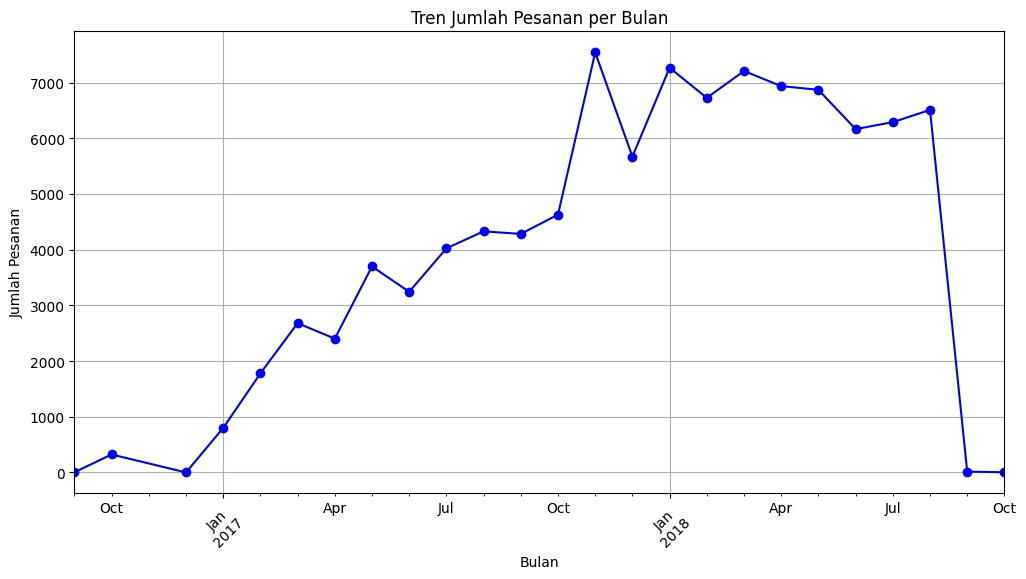

In [14]:
#Untuk melihat kinerja penjualan maka kita akan melakukan time series analysis untuk mengetahui jumlah order perbulannya.

# Mengatur ukuran tampilan
plt.figure(figsize=(12, 6))

# Menghitung jumlah pesanan per bulan
order_trend = df_order.groupby("order_month")["order_id"].count()

# Visualisasi tren jumlah pesanan dari waktu ke waktu
order_trend.plot(kind="line", marker="o", color="b")
plt.title("Tren Jumlah Pesanan per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pesanan")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Grafik menunjukkan tren jumlah pesanan per bulan. Dari sini, kita bisa melihat penjualan meningkat dari januari 2017 hingga agustus 2017 kemudian mengalami penurunan signifikan pada bulan september. 

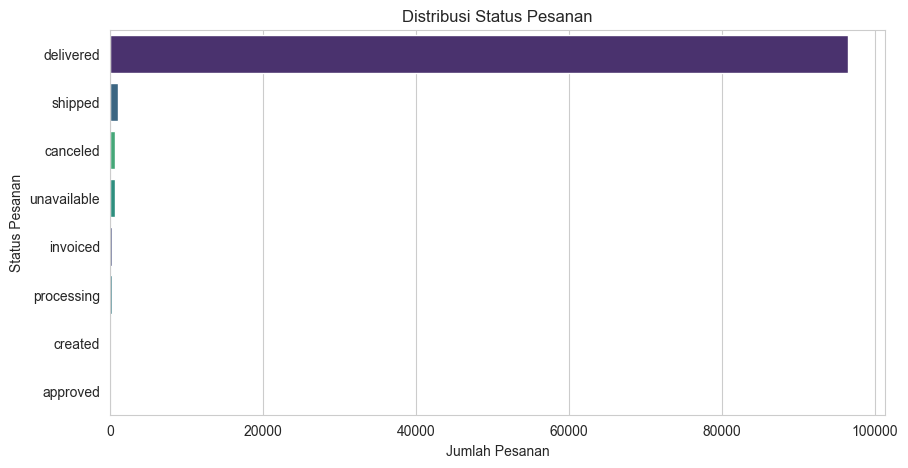

In [15]:
# Mengatur style visualisasi
sns.set_style("whitegrid")

# Distribusi status pesanan
plt.figure(figsize=(10, 5))
sns.countplot(y=df_order["order_status"], order=df_order["order_status"].value_counts().index, hue=df_order["order_status"], palette="viridis", legend=False)
plt.title("Distribusi Status Pesanan")
plt.xlabel("Jumlah Pesanan")
plt.ylabel("Status Pesanan")
plt.show()

Grafik menunjukkan distribusi status pesanan, yang membantu kita memahami berapa banyak pesanan yang berhasil diselesaikan, dibatalkan, atau masih dalam proses.

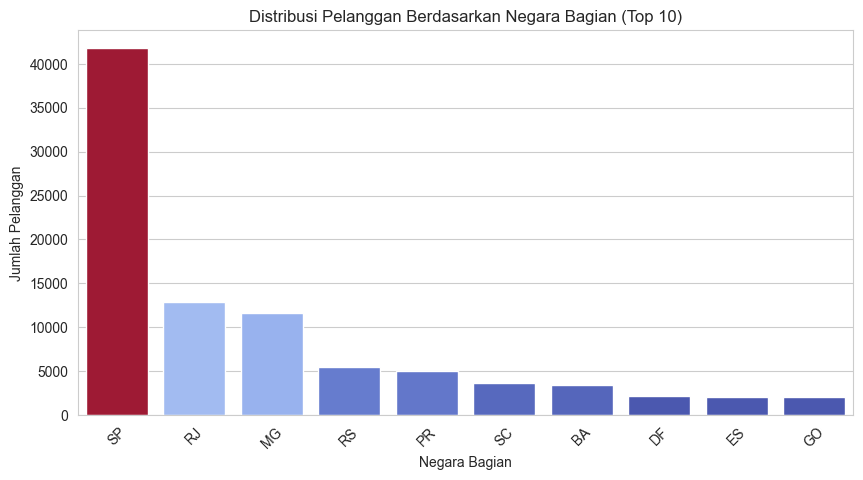

In [16]:
# Menghitung jumlah pelanggan per negara bagian
customer_state_counts = df_customer["customer_state"].value_counts().head(10)  # Menampilkan 10 besar

# Visualisasi distribusi pelanggan berdasarkan negara bagian
plt.figure(figsize=(10, 5))
sns.barplot(x=customer_state_counts.index, y=customer_state_counts.values, hue = customer_state_counts, palette="coolwarm", legend = False)
plt.title("Distribusi Pelanggan Berdasarkan Negara Bagian (Top 10)")
plt.xlabel("Negara Bagian")
plt.ylabel("Jumlah Pelanggan")
plt.xticks(rotation=45)
plt.show()

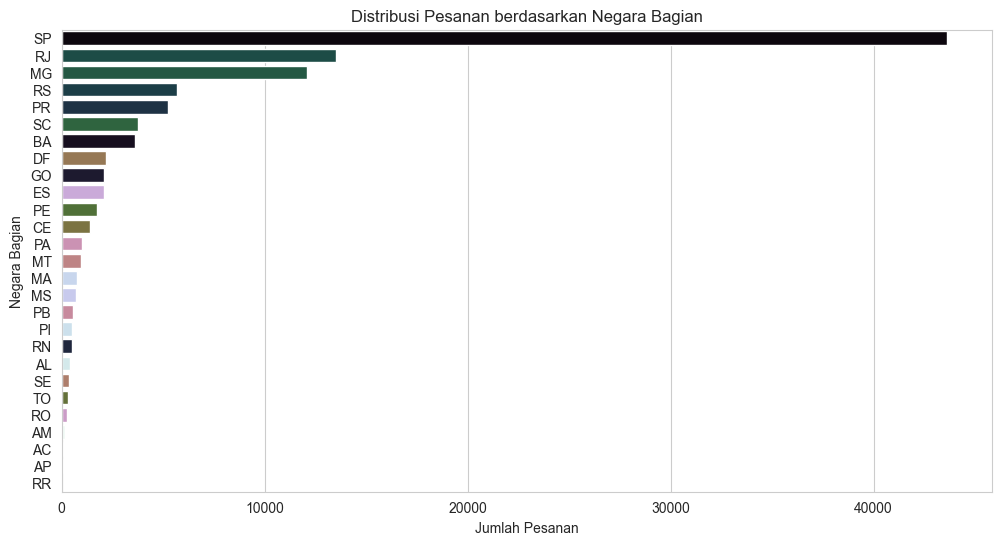

In [17]:
# Distribusi jumlah pesanan berdasarkan negara bagian pelanggan
plt.figure(figsize=(12, 6))
sns.countplot(y=merged_df["customer_state"], order=merged_df["customer_state"].value_counts().index, hue = merged_df["customer_state"], palette="cubehelix", legend = False)
plt.title("Distribusi Pesanan berdasarkan Negara Bagian")
plt.xlabel("Jumlah Pesanan")
plt.ylabel("Negara Bagian")
plt.show()

Distribusi Pesanan Berdasarkan Negara Bagian:
- Mayoritas pesanan berasal dari negara bagian SP (São Paulo), diikuti oleh RJ (Rio de Janeiro) dan MG (Minas Gerais).

### Pertanyaan 2:

Bagaimana customer behaviours meliputi jumlah cicilan dan metode pembayaran yang disukai customer?

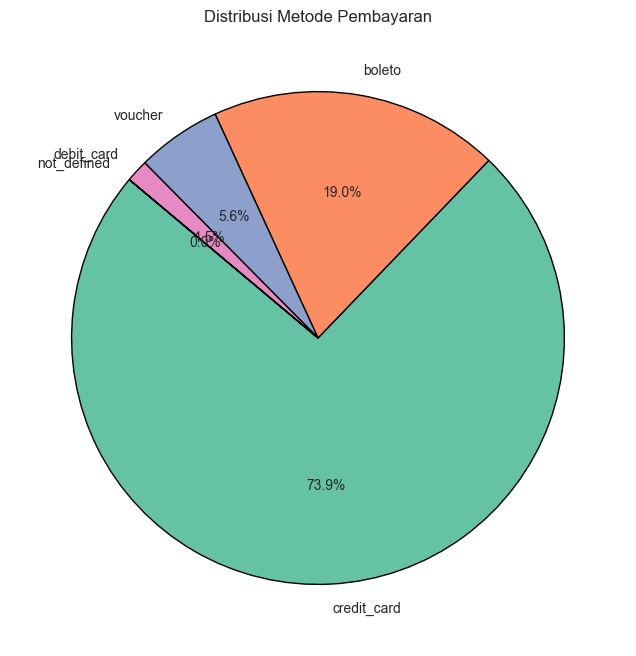

In [18]:
# Menghitung jumlah transaksi berdasarkan metode pembayaran
payment_method_counts = df_payment["payment_type"].value_counts()

# Menggunakan palet warna yang berbeda untuk setiap metode pembayaran
colors = sns.color_palette("Set2", len(payment_method_counts))

# Membuat pie chart dengan warna yang lebih sesuai
plt.figure(figsize=(8, 8))
plt.pie(payment_method_counts, labels=payment_method_counts.index, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})

plt.title("Distribusi Metode Pembayaran")
plt.show()

Grafik menunjukkan metode pembayaran yang paling sering digunakan oleh pelanggan. Dari sini, kita dapat melihat customer behaviour dalam melakukan payment terbanyak adalah dengan menggunakan credit card diikuti dengan baleto.

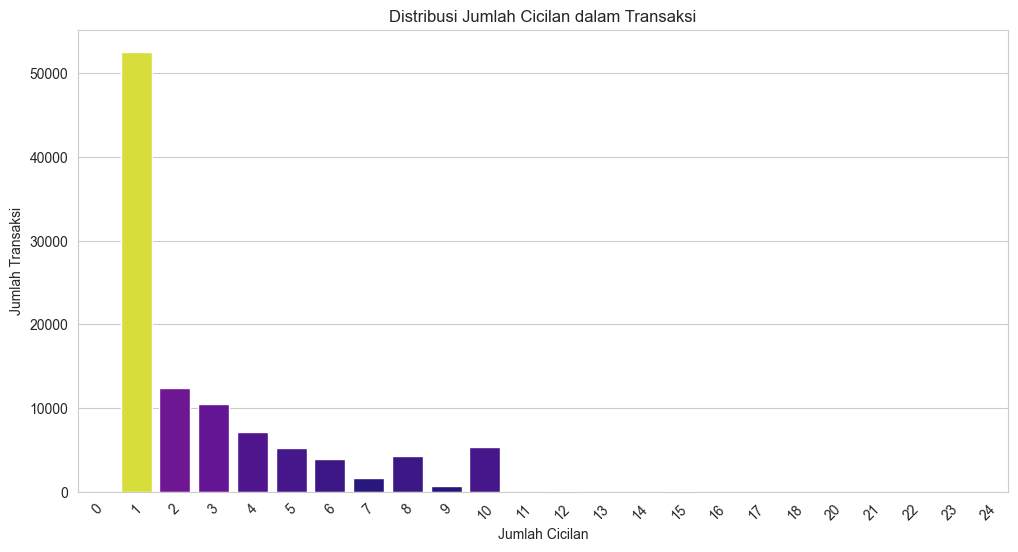

In [19]:
# Menghitung distribusi jumlah cicilan
installment_counts = df_payment["payment_installments"].value_counts().sort_index()

# Visualisasi distribusi jumlah cicilan dalam transaksi
plt.figure(figsize=(12, 6))
sns.barplot(x=installment_counts.index, y=installment_counts.values, palette="plasma", hue = installment_counts, legend = False)
plt.title("Distribusi Jumlah Cicilan dalam Transaksi")
plt.xlabel("Jumlah Cicilan")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.show()


Grafik menunjukkan distribusi jumlah cicilan dalam transaksi. Sebagian besar pelanggan tampaknya memilih pembayaran sekali bayar (cicilan 1), tetapi ada juga yang menggunakan cicilan lebih panjang.

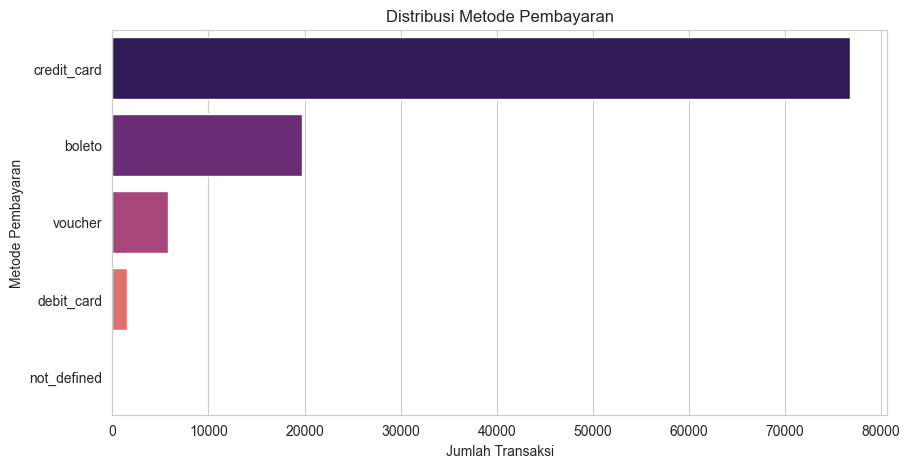

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur style visualisasi
sns.set_style("whitegrid")

# Distribusi metode pembayaran
plt.figure(figsize=(10, 5))
sns.countplot(y=df_payment["payment_type"], order=df_payment["payment_type"].value_counts().index, hue=df_payment["payment_type"], palette="magma", legend=False)
plt.title("Distribusi Metode Pembayaran")
plt.xlabel("Jumlah Transaksi")
plt.ylabel("Metode Pembayaran")
plt.show()


Metode Pembayaran:
- Mayoritas pembayaran dilakukan menggunakan credit card.
- Metode lain seperti boleto (transfer bank) dan voucher juga digunakan.



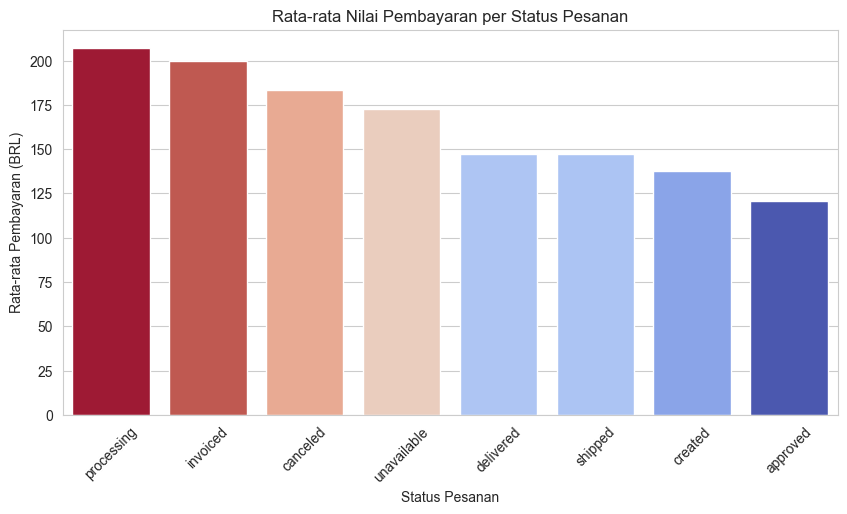

In [21]:
# Analisis rata-rata pembayaran berdasarkan status pesanan
payment_status = merged_df.groupby("order_status")["payment_value"].mean().sort_values(ascending=False)

# Visualisasi rata-rata pembayaran per status pesanan
plt.figure(figsize=(10, 5))
sns.barplot(x=payment_status.index, hue = payment_status, y=payment_status.values, palette="coolwarm", legend = False)
plt.title("Rata-rata Nilai Pembayaran per Status Pesanan")
plt.xlabel("Status Pesanan")
plt.ylabel("Rata-rata Pembayaran (BRL)")
plt.xticks(rotation=45)
plt.show()


Hasil Analisis Lanjutan
1. Rata - rata Nilai Pembayaran Berdasarkan Status Pesanan:
    - Pesanan dengan status delivered memiliki nilai pembayaran rata-rata tertinggi.
    - Pesanan canceled cenderung memiliki nilai pembayaran lebih rendah.

## Analisis Lanjutan (Opsional)

Untuk lebih dalam mengetahui customer behaviours, bisa dengan melakukan analisis RFM.

In [22]:
# RFM Analysis Preparation
#untuk melakukan RFM disini kita perlu memfilter data order karena hanya order yang berstatus delivered yang akan digunakan.
#Melihat status order
df_orders = df_order[df_order['order_status'] == "delivered"]

# Menghitung nilai terbaru untuk analisis recency
latest_date = df_orders["order_purchase_timestamp"].max()

# Menggabungkan df_orders dan df_payments untuk mendapatkan total nilai transaksi per order
df_rfm = df_orders.merge(df_payment, on="order_id", how="left")

# Menghitung Recency, Frequency, Monetary
rfm = df_rfm.groupby("customer_id").agg(
    Recency=("order_purchase_timestamp", lambda x: (latest_date - x.max()).days),
    Frequency=("order_id", "count"),
    Monetary=("payment_value", "sum")
).reset_index()

# Menampilkan 5 data pertama hasil RFM Analysis
rfm.head()


,customer_id,Recency,Frequency,Monetary
0,00012a2ce6f8dcda20d059ce98491703,287,1,114.74
1,000161a058600d5901f007fab4c27140,409,1,67.41
2,0001fd6190edaaf884bcaf3d49edf079,547,1,195.42
3,0002414f95344307404f0ace7a26f1d5,378,1,179.35
4,000379cdec625522490c315e70c7a9fb,149,1,107.01


In [23]:
df_orders.value_counts("order_status")

order_status
delivered    96478
Name: count, dtype: int64

Berdasarkan dataframe RFM diatas, mayoritas customer melakukan transaksi hanya 1 kali.
Setelah itu mari kita lakukan pengkategorian berdasarkan RM Score saja karena nilai F tidak terdistribusi dengan baik.

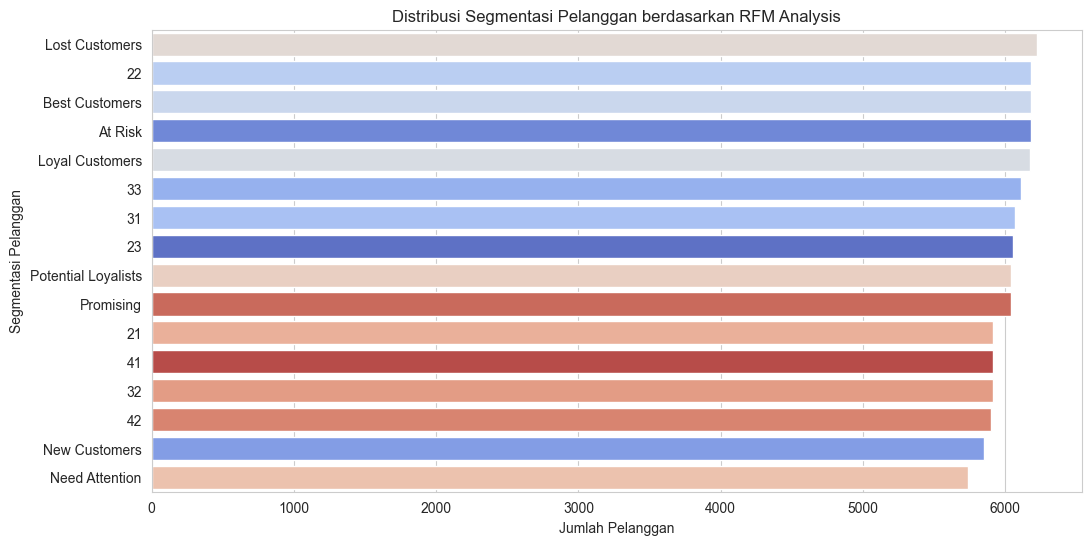

In [24]:
# Menentukan kuantil hanya untuk Recency dan Monetary karena Frequency bernilai konstan
rfm["R_Score"] = pd.qcut(rfm["Recency"], q=4, labels=[4, 3, 2, 1])
rfm["M_Score"] = pd.qcut(rfm["Monetary"], q=4, labels=[1, 2, 3, 4])

# Menggabungkan skor menjadi satu RFM Score tanpa Frequency
rfm["RFM_Score"] = rfm["R_Score"].astype(str) + rfm["M_Score"].astype(str)

# Menentukan kategori pelanggan berdasarkan skor
rfm["Segment"] = rfm["RFM_Score"].replace({
    "44": "Best Customers",
    "43": "Loyal Customers",
    "34": "Potential Loyalists",
    "14": "New Customers",
    "24": "Promising",
    "13": "Need Attention",
    "12": "At Risk",
    "11": "Lost Customers"
})

# Visualisasi distribusi segmentasi pelanggan
plt.figure(figsize=(12, 6))
sns.countplot(y=rfm["Segment"], order=rfm["Segment"].value_counts().index, hue = rfm["Segment"], palette="coolwarm", legend = False)
plt.title("Distribusi Segmentasi Pelanggan berdasarkan RFM Analysis")
plt.xlabel("Jumlah Pelanggan")
plt.ylabel("Segmentasi Pelanggan")
plt.show()


Grafik menunjukkan distribusi segmentasi pelanggan berdasarkan Recency dan Monetary. Beberapa temuan utama:
- Best Customers: Pelanggan dengan pembelian terbaru dan nilai transaksi tinggi.
- Loyal Customers: Pelanggan dengan transaksi tinggi tetapi mungkin sedikit lebih lama sejak pembelian terakhir.
- Lost Customers: Pelanggan yang sudah lama tidak melakukan pembelian dan nilai transaksinya kecil.

## Conclusion

1. Kinerja Penjualan
    - Tren Penjualan: Jumlah pesanan bervariasi dari waktu ke waktu, menunjukkan adanya fluktuasi penjualan yang bisa dipengaruhi oleh faktor musiman atau promosi.
    - Status Pesanan: Sebagian besar pesanan telah berhasil dikirimkan, tetapi ada juga pesanan yang dibatalkan atau tidak terselesaikan. Ini bisa menjadi area untuk meningkatkan layanan pelanggan.
    - Metode Pembayaran: Kartu kredit adalah metode pembayaran yang paling sering digunakan, diikuti oleh boleto (sistem pembayaran di Brazil).

2. Perilaku Customer dalam Bertransaksi
    - Metode Pembayaran: Sebagian besar pelanggan memilih pembayaran penuh tanpa cicilan.
    - Jumlah Cicilan: Meskipun mayoritas pelanggan memilih pembayaran langsung, ada segmen pelanggan yang menggunakan cicilan hingga 24 kali.
    - Distribusi Pelanggan: São Paulo (SP) memiliki jumlah pelanggan terbanyak, diikuti oleh Rio de Janeiro (RJ) dan Minas Gerais (MG).

3. RFM Analysis (Recency, Frequency, Monetary)
    - Best Customers: Pelanggan yang baru-baru ini melakukan pembelian dengan nilai transaksi tinggi(R dan M Tinggi). Ini adalah segmen yang perlu dipertahankan dengan loyalty program.
    - Lost Customers: Pelanggan yang sudah lama tidak bertransaksi dan memiliki nilai transaksi rendah (R dan M Rendah). Strategi retargeting bisa digunakan untuk mengaktifkan kembali pelanggan ini.
    - Need Attention & At Risk: Segmen pelanggan yang mungkin memerlukan promosi khusus atau penawaran menarik untuk meningkatkan engagement.

In [28]:
merged_df.to_csv("all_data.csv", index=False)

In [26]:
merged_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,date_payments,order_month,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017/10/02,2017-10,1.0,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017/10/02,2017-10,3.0,voucher,1.0,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017/10/02,2017-10,2.0,voucher,1.0,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018/07/24,2018-07,1.0,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018/08/08,2018-08,1.0,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103882,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,2017/03/09,2017-03,1.0,credit_card,3.0,85.08,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
103883,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,2018/02/06,2018-02,1.0,credit_card,3.0,195.00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
103884,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,2017/08/27,2017-08,1.0,credit_card,5.0,271.01,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
103885,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2018/01/08,2018-01,1.0,credit_card,4.0,441.16,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [27]:
merged_df.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
date_payments                            object
order_month                           period[M]
payment_sequential                      float64
payment_type                             object
payment_installments                    float64
payment_value                           float64
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
dtype: object